In [54]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math
import random

data = np.loadtxt('data-pca.txt', delimiter=',')

x = data[:,0]
y = data[:,1]

In [55]:
# function defs

def normalize_data(x, y):

    xn = (x - np.mean(x)) / np.std(x) # normalize x. the mean of xn is zero and the standard deviation of xn is one #
    yn = (y - np.mean(y)) / np.std(y) # normalize y. the mean of yn is zero and the standard deviation of yn is one #

    return xn, yn

def compute_covariance(x, y):
    
    Z = np.hstack((xn, yn))
    covar = (1/n_data)*(Z.T).dot(Z) # compute the covariance matrix #
    
    return covar

def compute_principal_direction(covariance):
    
    w, v = np.linalg.eig(covariance)

    direction = (v[:,0], v[:,1]) if (w[0] > w[1]) else (v[:, 0], v[:, 1]) # compute the principal directions from the co-variance matrix #
    
    return direction

def compute_projection(point, axis):

    projection = point.dot(axis).reshape(50, 1).dot(axis.reshape(1,2))# compute the projection of point on the axis #
    
    return projection

def compute_distance(point1, point2):

    distance = math.sqrt((a[0]-b[0])**2+(a[1]-b[1])**2) # compute the Euclidean distance between point1 and point2 #
    
    return distance

In [56]:
n_data = len(x)

x = np.array(x).reshape(-1,1)
y = np.array(y).reshape(-1,1)

In [57]:
xn, yn = normalize_data(x, y)
Z = np.hstack((xn, yn))
covariance = compute_covariance(xn,yn)

In [58]:
pr_vector1, pr_vector2 = compute_principal_direction(covariance)

In [59]:
p_axisX1 = np.linspace(-3,3,100)
p_axisY1 = (pr_vector1[0] / pr_vector1[1])*p_axisX1

In [60]:
p_axisX2 = np.linspace(-3,3,100)
p_axisY2 = (pr_vector2[0] / pr_vector2[1])*p_axisX2

In [61]:
norm_proj1 = compute_projection(Z, pr_vector1)
norm_proj2 = compute_projection(Z, pr_vector2)

1. plot the original data points

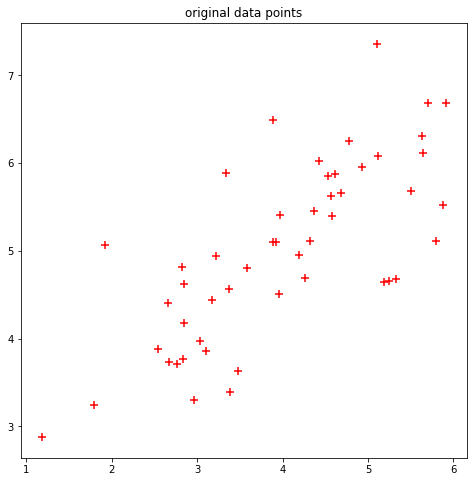

In [62]:
plt.figure(1, figsize=(8, 8))
plt.scatter(x, y, color='r', s=80, marker='+')
plt.title('original data points')
plt.show()

2. plot the normalized data points

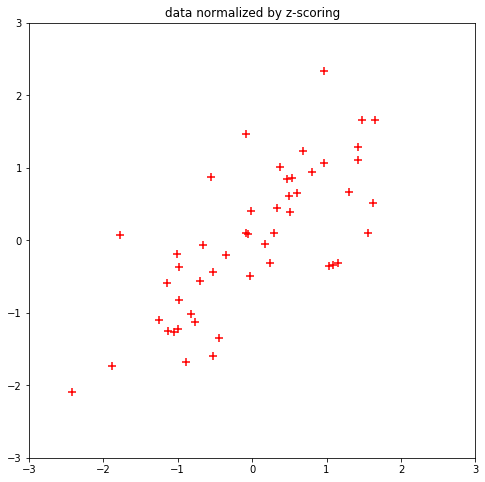

In [63]:
plt.figure(1, figsize=(8,8))
plt.xlim(-3,3)
plt.ylim(-3,3)
plt.scatter(xn,yn, color='r', s=80, marker='+')
plt.title('data normalized by z-scoring')
plt.show()


3. plot the principal axes

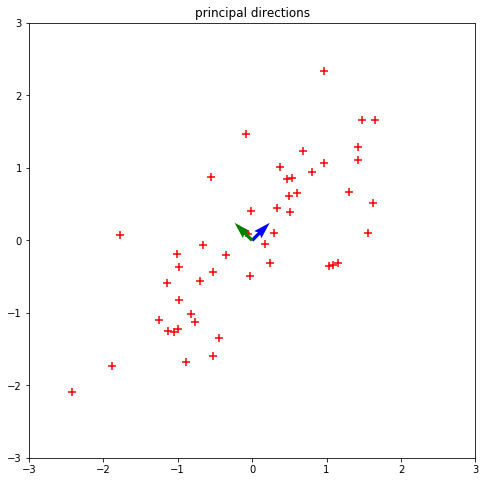

In [64]:
plt.figure(1, figsize=(8,8))
plt.xlim(-3,3)
plt.ylim(-3,3)
plt.scatter(xn,yn, color='r', s=80, marker='+')
plt.quiver(0, 0, pr_vector1[0], pr_vector1[1], color='b')
plt.quiver(0, 0, pr_vector2[0], pr_vector2[1], color='g')
plt.title('principal directions')
plt.show()

4. plot the first principal axis

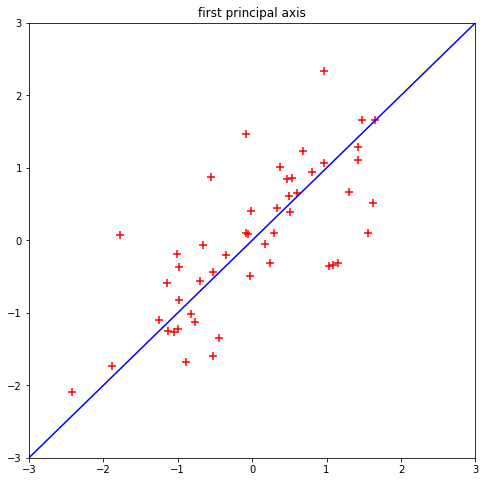

In [65]:
plt.figure(1, figsize=(8,8))
plt.xlim(-3,3)
plt.ylim(-3,3)
plt.scatter(xn,yn, color='r', s=80, marker='+')
plt.plot(p_axisX1, p_axisY1, color='b')
plt.title('first principal axis')
plt.show()

5. Plot the project of the normalized data points onto the first principal axis [4pt]

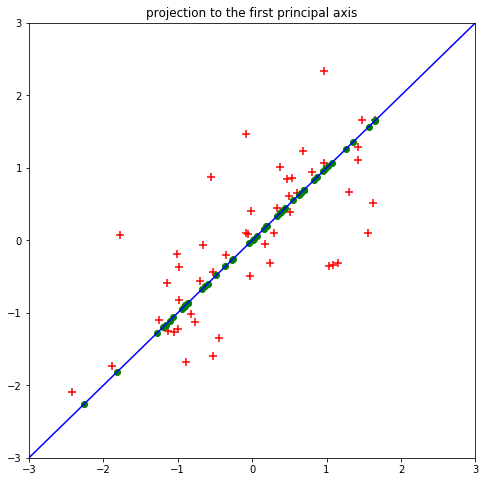

In [66]:
plt.figure(1, figsize=(8,8))
plt.xlim(-3,3)
plt.ylim(-3,3)
plt.scatter(xn,yn, color='r', s=80, marker='+')
plt.scatter(norm_proj1[:,0], norm_proj1[:,1], color='g', marker='o')
plt.plot(p_axisX1, p_axisY1, color='b')
plt.title('projection to the first principal axis')
plt.show()

6. Plot the lines between the normalized data points and their projection points on the first principal axis [3pt]

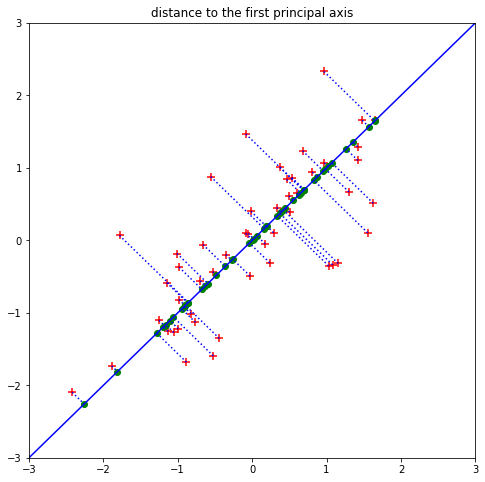

In [67]:
plt.figure(1, figsize=(8,8))
plt.xlim(-3,3)
plt.ylim(-3,3)
plt.scatter(xn,yn, color='r', s=80, marker='+')
plt.scatter(norm_proj1[:,0], norm_proj1[:,1], color='g', marker='o')
plt.plot(p_axisX1, p_axisY1, color='b')

for i in range(n_data):
    plt.plot((Z[i, 0], norm_proj1[i, 0]), (Z[i, 1], norm_proj1[i, 1]), linestyle=':', color='b')
plt.title('distance to the first principal axis')
plt.show()

7. Plot the second principal axis [3pt]

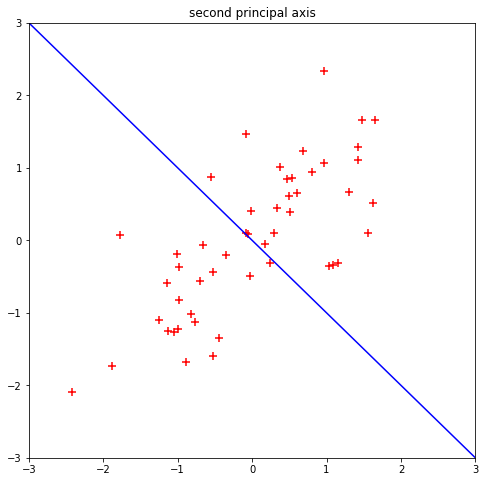

In [68]:
plt.figure(1, figsize=(8,8))
plt.xlim(-3,3)
plt.ylim(-3,3)
plt.scatter(xn,yn, color='r', s=80, marker='+')
plt.plot(p_axisX2, p_axisY2, color='b')
plt.title('second principal axis')
plt.show()

8. Plot the project of the normalized data points onto the second principal axis [4pt]

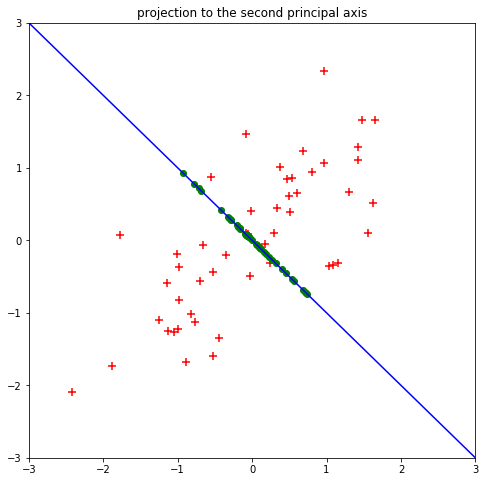

In [69]:
plt.figure(1, figsize=(8,8))
plt.xlim(-3,3)
plt.ylim(-3,3)
plt.scatter(xn,yn, color='r', s=80, marker='+')
plt.scatter(norm_proj2[:,0], norm_proj2[:,1], color='g', marker='o')
plt.plot(p_axisX2, p_axisY2, color='b')
plt.title('projection to the second principal axis')
plt.show()

9. Plot the lines between the normalized data points and their projection points on the second principal axis [3pt]

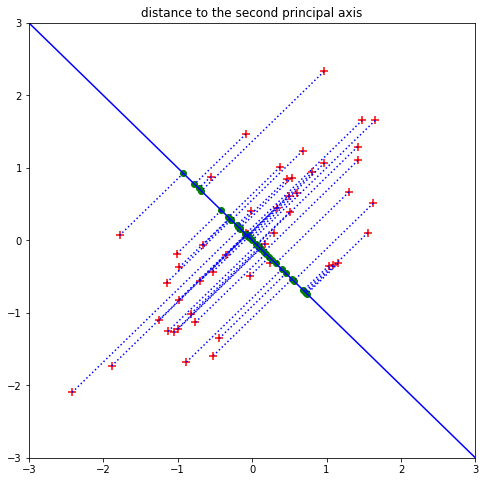

In [70]:
plt.figure(1, figsize=(8,8))
plt.xlim(-3,3)
plt.ylim(-3,3)
plt.scatter(xn,yn, color='r', s=80, marker='+')
plt.scatter(norm_proj2[:,0], norm_proj2[:,1], color='g', marker='o')
plt.plot(p_axisX2, p_axisY2, color='b')

for i in range(n_data):
    plt.plot((Z[i, 0], norm_proj2[i, 0]), (Z[i, 1], norm_proj2[i, 1]), linestyle=':', color='b')
plt.title('distance to the second principal axis')
plt.show()